In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score
from sklearn.preprocessing import OrdinalEncoder , StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.drop(columns = ['Car_Name'],inplace = True)

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isna().sum()

,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
df['Owner'].unique()

array([0, 1, 3])

In [ ]:
df['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace = True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [ ]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,1,0,0
1,2013,4.75,9.54,43000,1,1,0,0
2,2017,7.25,9.85,6900,0,1,0,0
3,2011,2.85,4.15,5200,0,1,0,0
4,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,0
297,2015,4.00,5.90,60000,0,1,0,0
298,2009,3.35,11.00,87934,0,1,0,0
299,2017,11.50,12.50,9000,1,1,0,0


In [ ]:
x = df.drop(columns = ['Selling_Price'])
y = df['Selling_Price']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train , y_train)

LinearRegression()

In [ ]:
training_accuracy = model.predict(x_train)

In [ ]:
print(f'R2 score of training {r2_score(y_train , training_accuracy)}')

R2 score of training 0.8838169193709796


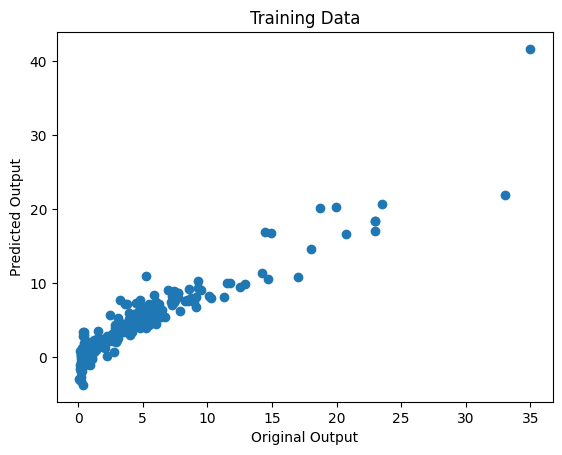

In [ ]:
plt.scatter(y_train , training_accuracy)
plt.title('Training Data')
plt.xlabel('Original Output')
plt.ylabel('Predicted Output')

plt.show()

In [ ]:
testing_accuracy = model.predict(x_test)

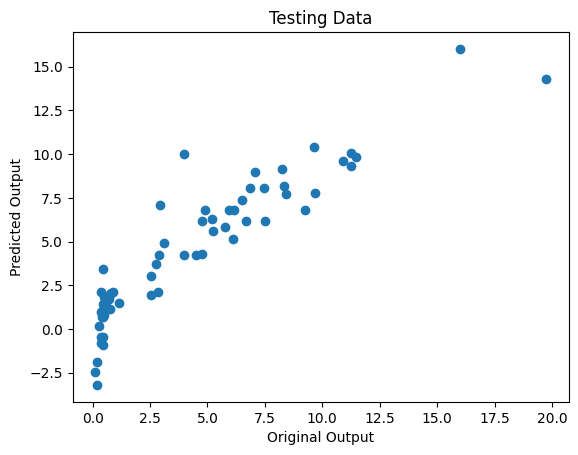

In [ ]:
plt.scatter(y_test , testing_accuracy)
plt.title('Testing Data')
plt.xlabel('Original Output')
plt.ylabel('Predicted Output')

plt.show()

In [ ]:
print(f'R2 score of testing {r2_score(y_test , testing_accuracy)}')

R2 score of testing 0.8401532365377697


In [ ]:
input_data = [2013 , 9.54	, 43000	,1,	1,	0,	0]
input_data = np.array(input_data)
input_data.resize(1,7)
input_data = pd.DataFrame(input_data)

In [ ]:
input_data

,0,1,2,3,4,5,6
0,2013.0,9.54,43000.0,1.0,1.0,0.0,0.0


In [ ]:
model.predict(input_data)

array([6.90499678])